<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

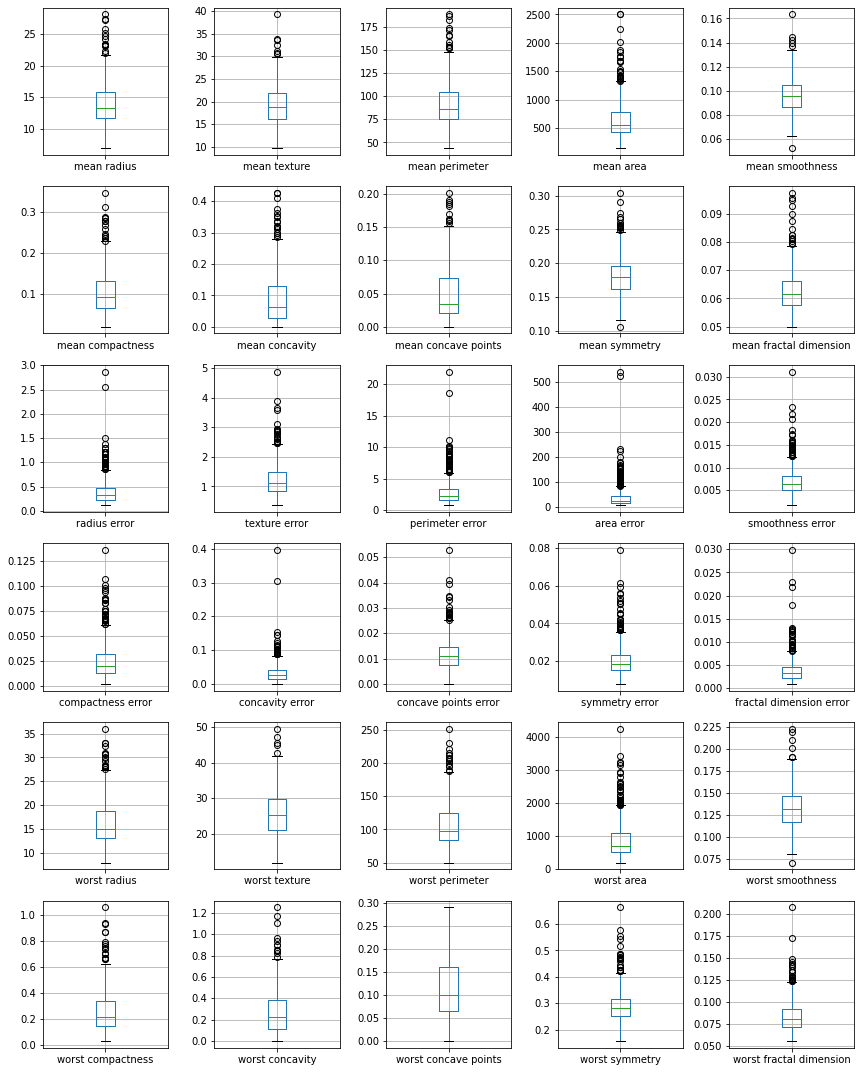

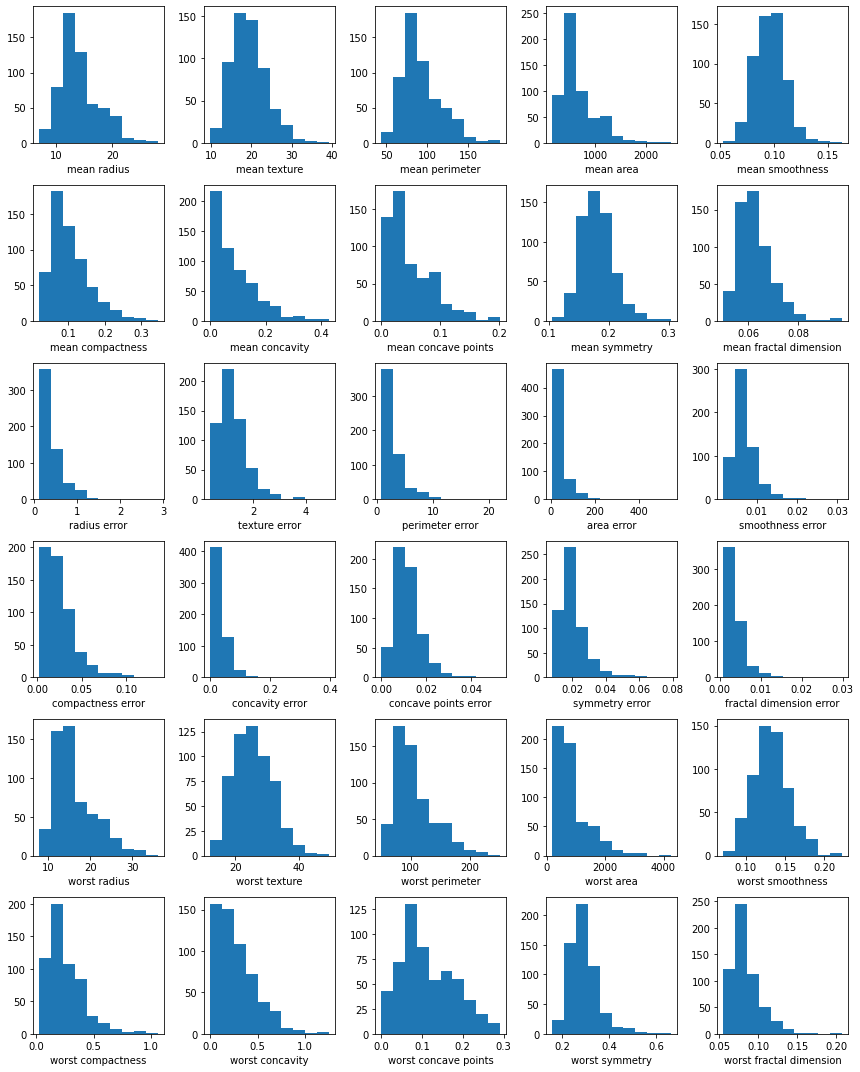

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, zero_one_loss, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')
cancer = load_breast_cancer()

# Generate the data
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Data information
print(df.info())

# Draw boxplots to visualize outliers
plt.figure(figsize=(12, 15))
for i in range(len(df.columns)-1):
    plt.subplot(6, 5, i+1)
    df.boxplot(column=df.columns[i])
plt.tight_layout()
plt.show()

# Plot histogram to check distribution
plt.figure(figsize=(12, 15))
for i in range(len(df.columns)-1):
    plt.subplot(6, 5, i+1)
    plt.hist(df[df.columns[i]])
    plt.xlabel(df.columns[i])
plt.tight_layout()
plt.show()

In [2]:
# Split into training and testing sets
X = df.drop('target', axis=1)
y = df['target']

# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling (if necessary)
cols = X_train.columns
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_train_scale = pd.DataFrame(X_train_scale, columns=[cols])
X_test_scale = pd.DataFrame(X_test_scale, columns=[cols])

In [3]:
# Logistic Regression
# Fit the Logistic Regression model (L-BFGS)
logreg_l = LogisticRegression(penalty='l2', multi_class='multinomial' ,solver='lbfgs', C=1000, random_state=0)
logreg_l.fit(X_train, y_train)

# Prediction
logreg_l_pred_train = logreg_l.predict(X_train)
logreg_l_pred_test = logreg_l.predict(X_test)

# Probability Prediction
logreg_l_pred_prob_train = logreg_l.predict_proba(X_train)
logreg_l_pred_prob_test = logreg_l.predict_proba(X_test)

In [4]:
# Fit the Logistic Regression model (Newton)
logreg_n = LogisticRegression(solver='newton-cg', max_iter=10000, penalty='none', verbose=True, class_weight='balanced')
logreg_n.fit(X_train, y_train)

# Prediction
logreg_n_pred_train = logreg_n.predict(X_train)
logreg_n_pred_test = logreg_n.predict(X_test)

# Probability Prediction
logreg_n_pred_prob_train = logreg_n.predict_proba(X_train)
logreg_n_pred_prob_test = logreg_n.predict_proba(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


In [5]:
# Linear Discriminant Analysis
# Build LDA Model
lda_clf = LinearDiscriminantAnalysis(n_components=1)
lda = lda_clf.fit(X_train,y_train)

# Prediction
lda_pred_train = lda.predict(X_train)
lda_pred_test = lda.predict(X_test)

# Probability Prediction
lda_pred_prob_train = lda.predict_proba(X_train)
lda_pred_prob_test = lda.predict_proba(X_test)

The best k: 5


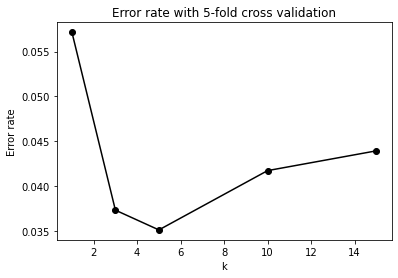

In [6]:
# KNN
# Cross validation with different k
ks = [1, 3, 5, 10, 15]
scores = []
for k in ks:
    knn = KNN(n_neighbors=k)
    score = cross_val_score(knn, X_train_scale, y_train, cv=5)
    scores.append(1 - score.mean())
plt.figure()
plt.plot(ks, scores, 'ko-')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rate with 5-fold cross validation')

# The best k
min_k = ks[np.argmin(scores)]
print('The best k:', min_k)
# A classifier with best k
knn = KNN(n_neighbors = min_k)
knn.fit(X_train_scale, y_train)

# Prediction
knn_pred_train = knn.predict(X_train_scale)
knn_pred_test = knn.predict(X_test_scale)

# Probability Prediction
knn_pred_prob_train = knn.predict_proba(X_train_scale)
knn_pred_prob_test = knn.predict_proba(X_test_scale)

In [7]:
# Naive Bayes Classification
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Prediction
gnb_pred_train = gnb.predict(X_train)
gnb_pred_test = gnb.predict(X_test)
mnb_pred_train = mnb.predict(X_train)
mnb_pred_test = mnb.predict(X_test)
bnb_pred_test = bnb.predict(X_test)
bnb_pred_train = bnb.predict(X_train)

# Probability Prediction
gnb_pred_prob_train = gnb.predict_proba(X_train)
gnb_pred_prob_test = gnb.predict_proba(X_test)
mnb_pred_prob_train = mnb.predict_proba(X_train)
mnb_pred_prob_test = mnb.predict_proba(X_test)
bnb_pred_prob_test = bnb.predict_proba(X_test)
bnb_pred_prob_train = bnb.predict_proba(X_train)

In [8]:
# Support Vector Machines
# Declare parameters for hyperparameter tuning
parameters = [{'C':[0.01, 0.1, 1], 'kernel':['linear']},
              {'C':[0.01, 0.1, 1], 'kernel':['rbf'], 'gamma':[0.01, 0.02, 0.05, 0.1, 0.5]},
              {'C':[0.01, 0.1, 1], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

# Instantiate SVM classifier
svc=SVC() 
grid_search_svc = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search_svc.fit(X_train_scale, y_train)

# The best parameters
print('Parameters that give the best results:\n', (grid_search_svc.best_params_))

# Prediction
svc_pred_train = grid_search_svc.predict(X_train_scale)
svc_pred_test = grid_search_svc.predict(X_test_scale)

print(grid_search_svc.score(X_test_scale, y_test))

Parameters that give the best results:
 {'C': 0.1, 'kernel': 'linear'}
0.9736842105263158


In [9]:
# Scores in each classifiers
print('Scores in training sets:')
print('Logistic (L-BFGS): %.3f'%accuracy_score(y_train, logreg_l_pred_train))
print('Logistic (Newton): %.3f'%accuracy_score(y_train, logreg_n_pred_train))
print('LDA: %.3f'%accuracy_score(y_train, lda_pred_train))
print('KNN: %.3f'%accuracy_score(y_train, knn_pred_train))
print('Native Bayes (Gaussian): %.3f'%accuracy_score(y_train, gnb_pred_train))
print('Native Bayes (Multinomial): %.3f'%accuracy_score(y_train, mnb_pred_train))
print('Native Bayes (Bernoulli): %.3f'%accuracy_score(y_train, bnb_pred_train))
print('SVM: %.3f'%accuracy_score(y_train, svc_pred_train))

print('\nScores in testing sets:')
print('Logistic (L-BFGS): %.3f'%accuracy_score(y_test, logreg_l_pred_test))
print('Logistic (Newton): %.3f'%accuracy_score(y_test, logreg_n_pred_test))
print('LDA: %.3f'%accuracy_score(y_test, lda_pred_test))
print('KNN: %.3f'%accuracy_score(y_test, knn_pred_test))
print('Native Bayes (Gaussian): %.3f'%accuracy_score(y_test, gnb_pred_test))
print('Native Bayes (Multinomial): %.3f'%accuracy_score(y_test, mnb_pred_test))
print('Native Bayes (Bernoulli): %.3f'%accuracy_score(y_test, bnb_pred_test))
print('SVM: %.3f'%accuracy_score(y_test, svc_pred_test))

Scores in training sets:
Logistic (L-BFGS): 0.956
Logistic (Newton): 1.000
LDA: 0.963
KNN: 0.978
Native Bayes (Gaussian): 0.947
Native Bayes (Multinomial): 0.897
Native Bayes (Bernoulli): 0.637
SVM: 0.987

Scores in testing sets:
Logistic (L-BFGS): 0.939
Logistic (Newton): 0.947
LDA: 0.965
KNN: 0.956
Native Bayes (Gaussian): 0.930
Native Bayes (Multinomial): 0.895
Native Bayes (Bernoulli): 0.588
SVM: 0.974


In [10]:
# Evaluate error
print('In training sets (%d instances in total), the number of errors:'%len(y_train))
print('Logistic (L-BFGS): %d'%zero_one_loss(y_train, logreg_l_pred_train, normalize=False))
print('Logistic (Newton): %d'%zero_one_loss(y_train, logreg_n_pred_train, normalize=False))
print('LDA: %d'%zero_one_loss(y_train, lda_pred_train, normalize=False))
print('KNN: %d'%zero_one_loss(y_train, knn_pred_train, normalize=False))
print('Native Bayes (Gaussian): %d'%zero_one_loss(y_train, gnb_pred_train, normalize=False))
print('Native Bayes (Multinomial): %d'%zero_one_loss(y_train, mnb_pred_train, normalize=False))
print('Native Bayes (Bernoulli): %d'%zero_one_loss(y_train, bnb_pred_train, normalize=False))
print('SVM: %d'%zero_one_loss(y_train, svc_pred_train, normalize=False))

print('\nIn testing sets (%d instances in total), the number of errors:'%len(y_test))
print('Logistic (L-BFGS): %d'%zero_one_loss(y_test, logreg_l_pred_test, normalize=False))
print('Logistic (Newton): %d'%zero_one_loss(y_test, logreg_n_pred_test, normalize=False))
print('LDA: %d'%zero_one_loss(y_test, lda_pred_test, normalize=False))
print('KNN: %d'%zero_one_loss(y_test, knn_pred_test, normalize=False))
print('Native Bayes (Gaussian): %d'%zero_one_loss(y_test, gnb_pred_test, normalize=False))
print('Native Bayes (Multinomial): %d'%zero_one_loss(y_test, mnb_pred_test, normalize=False))
print('Native Bayes (Bernoulli): %d'%zero_one_loss(y_test, bnb_pred_test, normalize=False))
print('SVM: %d'%zero_one_loss(y_test, svc_pred_test, normalize=False))

In training sets (455 instances in total), the number of errors:
Logistic (L-BFGS): 20
Logistic (Newton): 0
LDA: 17
KNN: 10
Native Bayes (Gaussian): 24
Native Bayes (Multinomial): 47
Native Bayes (Bernoulli): 165
SVM: 6

In testing sets (114 instances in total), the number of errors:
Logistic (L-BFGS): 7
Logistic (Newton): 6
LDA: 4
KNN: 5
Native Bayes (Gaussian): 8
Native Bayes (Multinomial): 12
Native Bayes (Bernoulli): 47
SVM: 3


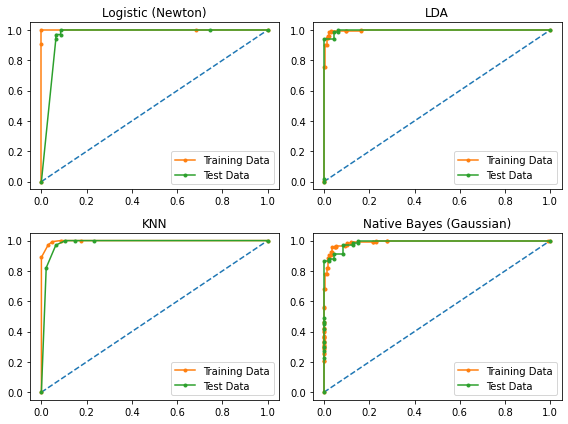

AUC in training sets:
Logistic (Newton): 1.000
LDA: 0.997
KNN: 0.997
Native Bayes (Gaussian): 0.990

AUC in testing sets:
Logistic (Newton): 0.966
LDA: 0.997
KNN: 0.982
Native Bayes (Gaussian): 0.989


In [11]:
# ROC curve and AUC score
plt.figure(figsize=(8, 6))
pred_prob_train = [logreg_n_pred_prob_train, lda_pred_prob_train, knn_pred_prob_train, gnb_pred_prob_train]
pred_prob_test = [logreg_n_pred_prob_test, lda_pred_prob_test, knn_pred_prob_test, gnb_pred_prob_test]
classifier = ['Logistic (Newton)', 'LDA', 'KNN', 'Native Bayes (Gaussian)']
for i in range(4):
    fpr_train, tpr_train, thresholds = roc_curve(y_train, pred_prob_train[i][:,1])
    fpr_test, tpr_test, thresholds = roc_curve(y_test, pred_prob_test[i][:,1])
    plt.subplot(2, 2, i+1)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr_train, tpr_train, marker='.', label = 'Training Data')
    plt.plot(fpr_test, tpr_test, marker='.', label = 'Test Data')
    plt.legend(loc=0)
    plt.title(classifier[i])
plt.tight_layout()
plt.show()

print('AUC in training sets:')
print('Logistic (Newton): %.3f'%roc_auc_score(y_train, logreg_n_pred_prob_train[:,1]))
print('LDA: %.3f'%roc_auc_score(y_train, lda_pred_prob_train[:,1]))
print('KNN: %.3f'%roc_auc_score(y_train, knn_pred_prob_train[:,1]))
print('Native Bayes (Gaussian): %.3f'%roc_auc_score(y_train, gnb_pred_prob_train[:,1]))

print('\nAUC in testing sets:')
print('Logistic (Newton): %.3f'%roc_auc_score(y_test, logreg_n_pred_prob_test[:,1]))
print('LDA: %.3f'%roc_auc_score(y_test, lda_pred_prob_test[:,1]))
print('KNN: %.3f'%roc_auc_score(y_test, knn_pred_prob_test[:,1]))
print('Native Bayes (Gaussian): %.3f'%roc_auc_score(y_test, gnb_pred_prob_test[:,1]))

In [12]:
# Classification report
print('Classification report:')
print('\nLogistic (Newton): \n', classification_report(y_test, logreg_n_pred_test))
print('\nLDA: \n', classification_report(y_test, lda_pred_test))
print('\nKNN: \n', classification_report(y_test, knn_pred_test))
print('\nNative Bayes (Gaussian): \n', classification_report(y_test, gnb_pred_test))
print('\nSVM: \n', classification_report(y_test, svc_pred_test))

Classification report:

Logistic (Newton): 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.96      0.96      0.96        67

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114


LDA: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


KNN: 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg 